# Convolutional Neural Network

### Modules

In [467]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Neural Network Configuration

In [468]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

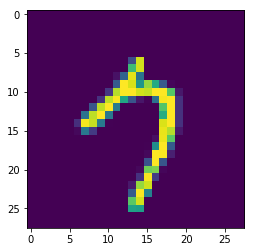

In [469]:
import matplotlib.pyplot as plt
import random
random_num = random.randint(0,784)
plt.imshow(x_train[random_num])

#code derived from tutorials from harrison kinsley, 
#towardsdatascience, previous programs, and other sources

In [470]:
y_train[random_num]

7

In [471]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [472]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [473]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, Sequential

In [474]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[random_num]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Build Model

In [475]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [476]:
model = Sequential()
default_shape = (28,28,1)

In [477]:
model.add(Conv2D(64, (3,3), input_shape=default_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [478]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1304 - accuracy: 0.9612 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 2/8
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 3/8
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0386 - val_accuracy: 0.9874
Epoch 4/8
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0475 - val_accuracy: 0.9865
Epoch 5/8
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 6/8
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0563 - val_accuracy: 0.9857
Epoch 7/8
60000/60000 [==============================] - 64s 1

### Equilibrium in model accuracy reached at eighth epoch?

In [479]:
preds = model.predict(x_test, batch_size=128)
preds = preds.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [480]:
from sklearn.metrics import classification_report
print('Classification report for model!\n')
print(classification_report(y_test, preds))

Classification report for model!

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

